In [66]:
import torch
from torch import nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import random
import numpy as np

In [148]:
EPOCH = 5
BATCH_SIZE = 128
LR = 0.005
DOWNLOAD_MNIST = False # mnist already exists
N_TEST_IMG = 5 # show 5 images at one time

torch.Size([60000, 28, 28]) 
 torch.Size([60000]) 



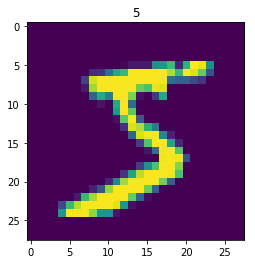

In [149]:
train_data = torchvision.datasets.MNIST(
    root = '../mnist/',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = DOWNLOAD_MNIST,
)
print(
    train_data.data.size(),'\n',
    train_data.targets.size(),'\n',
)
plt.imshow(train_data.data[0])
plt.title('%i'%train_data.targets[0])
plt.show()
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
view_data = train_data.data[0:5].view(-1,28*28).to(torch.FloatTensor()).to('cuda')/255

In [150]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,512),
            nn.Tanh(),
            nn.Linear(512,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,16),
            nn.Tanh(),
            nn.Linear(16,4),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4,16),
            nn.Tanh(),
            nn.Linear(16,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,512),
            nn.Tanh(),
            nn.Linear(512,28*28),
            nn.Sigmoid(),
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded

autoencoder = AutoEncoder().to('cuda')
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=16, bias=True)
    (7): Tanh()
    (8): Linear(in_features=16, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=512, bias=True)
    (7): Tanh()
    (8): Linear(in_features=512, out_features=784, bias=True)
    (9): Sigmoid()
  )
)


EPOCH:  0  | STEP:  0  | loss:  0.03163222


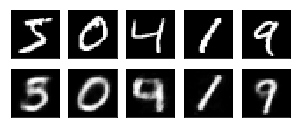

EPOCH:  0  | STEP:  100  | loss:  0.032194167


<Figure size 432x288 with 0 Axes>

EPOCH:  0  | STEP:  200  | loss:  0.028311053


<Figure size 432x288 with 0 Axes>

EPOCH:  0  | STEP:  300  | loss:  0.031823225


<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [153]:
optimizer = torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func = nn.MSELoss()
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion() # continuously plot
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.to('cpu').data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        x = x.view(-1,28*28).to('cuda')
        y = x.view(-1,28*28).to('cuda')
        autoencoder = autoencoder.to('cuda')
        encoded,decoded = autoencoder(x)
        loss = loss_func(decoded,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%100 == 0:
            print('EPOCH: ',epoch,' | STEP: ',step,' | loss: ',loss.to('cpu').data.numpy())
            _,decoded_data = autoencoder(view_data)
            decoded_data = decoded_data.to('cpu').data.numpy()
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data[i],(28,28)),cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.draw()
            plt.pause(0.05)
plt.ioff()
plt.show()

IndentationError: unexpected indent (<ipython-input-126-b91f1970a553>, line 2)